In [1]:
# Các thư viện:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats


%matplotlib inline
plt.rcParams['figure.figsize'] =  [16,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [2]:
# Các hàm:
def hist(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/st

In [3]:
df = pd.read_csv('Diet_R.csv')

In [4]:
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
55,41,1.0,51,191,71,2,66.8
77,78,1.0,51,175,88,3,81.9
15,14,0.0,37,167,82,1,81.1
52,22,1.0,42,166,85,1,81.5
64,50,1.0,39,180,80,2,81.4
70,71,1.0,31,177,78,3,75.2
53,23,1.0,39,166,87,1,81.9
74,75,1.0,49,177,84,3,79.9
41,63,0.0,35,171,72,3,64.4
76,77,1.0,40,167,87,3,77.8


In [5]:
# Index 25, 26 thiếu dữ liệu -> loại bỏ 
rm = df.drop([0, 1])
rm

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [6]:
# Sắp xếp index 

t = rm.set_index('Person')
data_new = t.sort_index()
data_new

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0.0,22,159,58,1,54.2
2,0.0,46,192,60,1,54.0
3,0.0,55,170,64,1,63.3
4,0.0,33,171,64,1,61.1
5,0.0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1.0,35,183,83,3,80.2
75,1.0,49,177,84,3,79.9
76,1.0,28,164,85,3,79.7


In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 78
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     float64
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   pre.weight    76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.2 KB


## TASK 1: Ignore diet and test to see if weight has been lost


## Phát biểu giả thiết
Phát biểu giả thiết:

H0 : μ0=μ1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau

H1 : μ0≠μ1 . Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [8]:
pre_w = data_new['pre.weight']
aft_w = data_new['weight6weeks']

In [9]:
stt, p = stats.ttest_ind(pre_w, aft_w)
print('Giá trị kiểm định = ',stt)
print('pvalue  = ',p)
if (p > 0.05):
    print("Không có bằng chứng thống kê để bác bỏ H0 ")
    print('Điều này ngụ ý là: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau với mức ý nghĩa 5% ')
else:
    print('Đã có đủ bằng chứng thống kê để bác bỏ H0')
    print('Ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Cân nặng trung bình của trước và sau khi giảm cân khác nhau')

Giá trị kiểm định =  3.0342255247628476
pvalue  =  0.0028431949414180584
Đã có đủ bằng chứng thống kê để bác bỏ H0
Ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%
Cân nặng trung bình của trước và sau khi giảm cân khác nhau


## Task 2: Remove weight lost and get students to calculate it using before/after weights

In [10]:
#Thêm cột dữ liệu weight lost
lw = pre_w- aft_w
data_new.insert(6, 'weightlost', lw)
data_new.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0.0,22,159,58,1,54.2,3.8
2,0.0,46,192,60,1,54.0,6.0
3,0.0,55,170,64,1,63.3,0.7
4,0.0,33,171,64,1,61.1,2.9
5,0.0,50,170,65,1,62.2,2.8
6,0.0,50,201,66,1,64.0,2.0
7,0.0,37,174,67,1,65.0,2.0
8,0.0,28,176,69,1,60.5,8.5
9,0.0,28,165,70,1,68.1,1.9


Text(0.5, 1.0, 'Truoc va sau khi giam can')

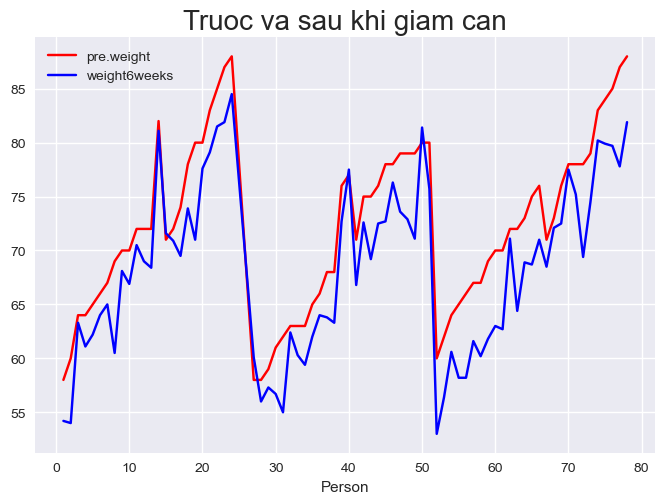

In [11]:
# Biểu đồ cân nặng trước và sau khi giảm cân
plt.style.use('seaborn')
data_new[['pre.weight', 'weight6weeks']].plot(color= ['r', 'b'])
plt.title('Truoc va sau khi giam can', fontsize=20)

In [12]:
std1, p1 = scipy.stats.ttest_ind(pre_w, aft_w)
print('statistic:',std1,' p_value:',p1)
if p1 < 0.05:
    print('Có đủ bằng chứng thống kê để bác bỏ giả thuyết H0')
else:
    print('Chưa có đủ bằng chứng thống kê để bác bỏ giả thuyết H0')

statistic: 3.0342255247628476  p_value: 0.0028431949414180584
Có đủ bằng chứng thống kê để bác bỏ giả thuyết H0


## Task 3: Summary statistics by diet

In [13]:
x= df.groupby('Diet')['Diet'].count()
y = pd.DataFrame(x)
y.columns=["số người"]
y['%']=y/sum(y['số người'])*100
y

,số người,%
Diet,,
1,24,30.769231
2,27,34.615385
3,27,34.615385


In [14]:
# Lấy="Diet" và "lostweight" để phân tích 

Dl = data_new[['Diet', 'weightlost']]
diet = data_new.groupby('Diet').groups

type_1 = data_new['weightlost'][diet[1]]
type_1.name = 'Diet Type 1'
type_2 = data_new['weightlost'][diet[2]]
type_2.name = 'Diet Type 2'
type_3 = data_new['weightlost'][diet[3]]
type_3.name = 'Diet Type 3'
print(type_1.describe())
print(type_2.describe())
print(type_3.describe())

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
Name: Diet Type 1, dtype: float64
count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
Name: Diet Type 2, dtype: float64
count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
Name: Diet Type 3, dtype: float64


## Task 4: One way ANOVA


## Sử dụng Shapiro-Wilk test
## Phát biểu giả thiết:
$H_0$: Diet type 1 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn

In [16]:
st1, p1 = stats.shapiro(type_1)
print('statistic of Diet type 1 = ',st1)
print('pvalue of Diet type 1 = ',p1)
if (p1 > 0.05):
    print("Không có bằng chứng để bác bỏ H0: ")
    print('Điều này ngụ ý là Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 1 =  0.9255314469337463
pvalue of Diet type 1 =  0.07748671621084213
Không có bằng chứng để bác bỏ H0: 
Điều này ngụ ý là Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp


## Phát biểu giả thiết:
$H_0$: Diet type 2 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn

In [17]:
st2, p2 = stats.shapiro(type_2)
print('statistic of Diet type 2 = ',st2)
print('pvalue of Diet type 2 = ',p2)
if (p2 > 0.05):
    print("Không có bằng chứng để bác bỏ H0 ")
    print('Điều này ngụ ý là Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 2 =  0.9793620705604553
pvalue of Diet type 2 =  0.8721737861633301
Không có bằng chứng để bác bỏ H0 
Điều này ngụ ý là Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp


## Phát biểu giả thiết:
$H_0$: Diet type 3 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn

In [18]:
st3, p3 = stats.shapiro(type_3)
print('statistic of Diet type 3 = ',st3)
print('pvalue of Diet type 13 = ',p3)
if (p3 > 0.05):
    print("Không có bằng chứng để bác bỏ H0")
    print('Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 3 =  0.9601252675056458
pvalue of Diet type 13 =  0.37203603982925415
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%
Đủ điều kiện để phân tích tiếp


## Kiểm định tính thuần nhất phương sai

Bartlett’s Test

Phát biểu các giả thiết:

$H_0$: Các feature đều có phương sai đồng nhất

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [20]:
st13, p13 = stats.bartlett(type_1, type_2, type_3)
print('statistic by Bartlett = ',st13)
print('pvalue by Bartlett = ',p13)
if (p13 > 0.05):
    print('Không có bằng chứng để bác bỏ H0')
    print('Điều này ngụ ý Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')

statistic by Bartlett =  0.21811133918795061
pvalue by Bartlett =  0.8966804982694925
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA


## Kiểm định ANOVA one way
## Phát biểu giả thiết:
$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [21]:
from scipy.stats import f_oneway
st, p = f_oneway(type_1, type_2, type_3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")
    print("Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt")

Giá trị kiểm định:  5.383104474859926
p_value:  0.006595853108669741
Có bằng chứng bác bỏ giả thuyết H0


Text(0, 0.5, 'Count')

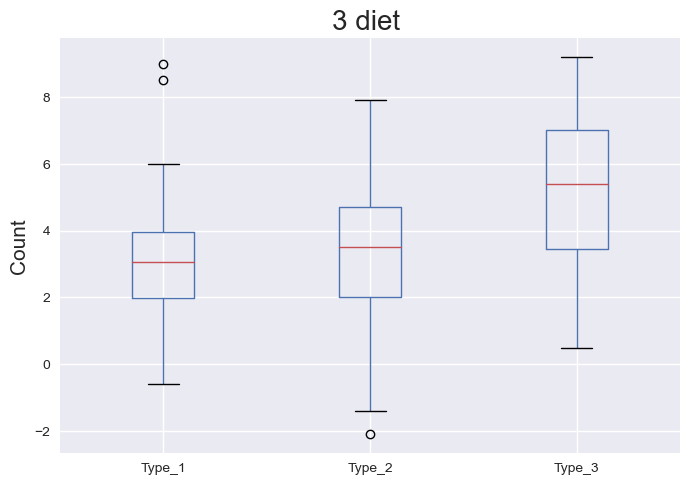

In [22]:
plt.title('3 diet ', fontsize=20)
pd.DataFrame({'Type_1': type_1, 'Type_2': type_2, 'Type_3': type_3}).boxplot()
plt.ylabel('Count', fontsize=15)

## Kiểm tra các điều kiện cho kiểm định Anova

In [23]:
model = ols('weightlost ~ C(Diet)', data = data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


##  Are there gender differences for weight lost?

Xây dựng giả thuyết:

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [25]:
df = data_new[['gender', 'weightlost']]
df

,gender,weightlost
Person,,
1,0.0,3.8
2,0.0,6.0
3,0.0,0.7
4,0.0,2.9
5,0.0,2.8
...,...,...
74,1.0,2.8
75,1.0,4.1
76,1.0,5.3


## Summary statistics

In [26]:
# Bảng tần số
gen = df.groupby('gender')['gender'].count()
gend = pd.DataFrame(gen)
gend.columns = ['Số người']
gend['Phần trăm'] = gend/sum(gend['Số người'])*100
gend

,Số người,Phần trăm
gender,,
0.0,43,56.578947
1.0,33,43.421053


In [30]:
# Nhóm các mẫu
gr = df.groupby('gender').groups
fema = df['weightlost'][gr[0]]
fema.name = 'Female'
ma = df['weightlost'][gr[1]]
ma.name = 'Male'

## Bởi 2 mẫu có kích thước không bằng nhau nên ta lấy ngẫu nhiên 30 giá trị ngẫu nhiên trong mỗi mẫu.

In [31]:
female = fema.sample(30)
male = ma.sample(30)

## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa
## Sử dụng Shapiro-Wilk test
## Phát biểu giả thiết:
$H_0$: female là dữ liệu tuân theo phân phối chuẩn

$H_a$: female không phải là dữ liệu tuân theo phân phối chuẩn

In [34]:
stf, pf = stats.shapiro(female)
print('statistic of Diet female = ',stf)
print('pvalue of Diet female = ',pf)
if (pf > 0.05):
    print("Không có bằng chứng để bác bỏ H0 ")
    print('Điều này ngụ ý là:female là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('female không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet female =  0.9616776704788208
pvalue of Diet female =  0.34167546033859253
Không có bằng chứng để bác bỏ H0 
Điều này ngụ ý là:female là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp


## Phát biểu giả thiết:¶
$H_0$: male là dữ liệu tuân theo phân phối chuẩn

$H_a$: male không phải là dữ liệu tuân theo phân phối chuẩn

In [35]:
stm, pm = stats.shapiro(male)
print('statistic of Diet female = ',stm)
print('pvalue of Diet female = ',pm)
if (pm > 0.05):
    print("Không có bằng chứng để bác bỏ H0")
    print('Điều này ngụ ý là male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('male không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet female =  0.9658335447311401
pvalue of Diet female =  0.43229156732559204
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý là male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp


## Kiểm định tính thuần nhất phương sai (homogeneity of variance)
## Bartlett’s Test
Phát biểu các giả thiết:

$H_0$: Các feature đều có phương sai đồng nhất

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [36]:
stfm, pfm = stats.bartlett(female, male)
print('statistic by Bartlett = ',stfm)
print('pvalue by Bartlett = ',pfm)
if (pfm > 0.05):
    print('Không có bằng chứng để bác bỏ H0')
    print('Điều này ngụ ý Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')

statistic by Bartlett =  0.5179352625207528
pvalue by Bartlett =  0.4717237715681136
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA


## Xây dựng giả thuyết:
$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [37]:
st, p = f_oneway(type_1, type_2, type_3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")

Giá trị kiểm định:  5.383104474859926
p_value:  0.006595853108669741
Có bằng chứng bác bỏ giả thuyết H0


In [38]:
# ANOVA Table
model = ols('weightlost ~ C(gender)', data=data_new).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


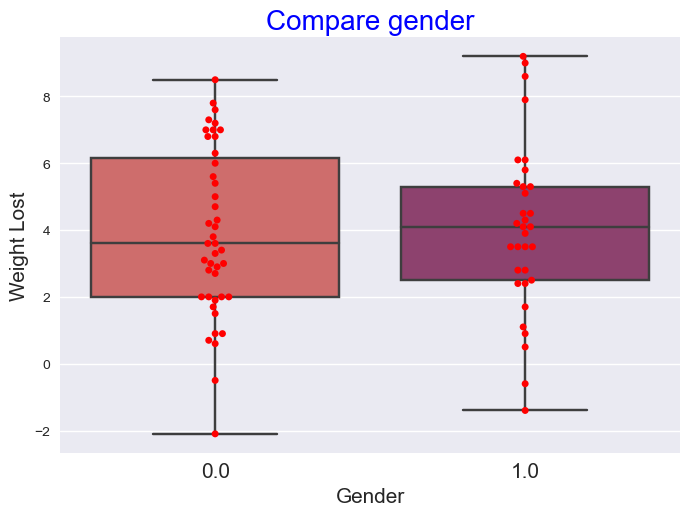

In [43]:
### Kỹ thuật EDA:
df = df.replace(to_replace =[0,1], 
                            value =['Female','Male'])
sns.boxplot(x='gender', y='weightlost', data=data_new, palette='flare')
sns.swarmplot(x="gender", y='weightlost', data=data_new, color='red')
plt.title('Compare gender',  size=20, color='blue')
plt.xticks(size=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Weight Lost',fontsize=15)
plt.show()

## Task5: Two-way ANOVA (perform)
Giả thuyết:

$H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.

$H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [41]:
p = {}

def results(p, alpha=0.05):
    cols=['mean1', 'mean2', 'score','p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

    
p['mean1'] = np.mean(female)
p['mean2'] = np.mean(male)
p['score'], p['p_value'] = stats.ttest_ind(female, male)
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.846667,3.876667,-0.04733,0.962413,Chấp nhận H0 với mức ý nghĩa 0.05


## Task 6: Interactions

Means plot of weight lost by diet and gender

In [75]:
task6 = data_new[['Diet', 'weightlost', 'gender']]

Text(0.5, 1.0, 'Means plot of weight lost by diet and gender')

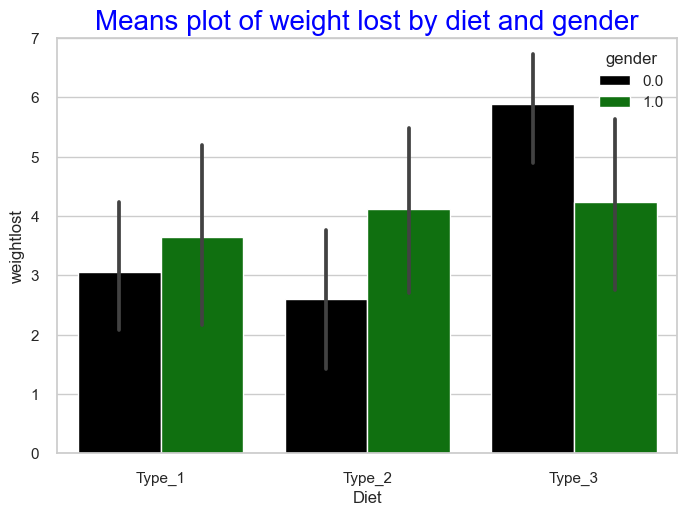

In [78]:
sns.set_theme(style="whitegrid")
g=sns.barplot(x="Diet", y="weightlost", hue="gender", data = task6, palette=['black','green'])
g.set_xticklabels(["Type_1", "Type_2", "Type_3"])
g.set(ylim=(0, 7))
plt.title('Means plot of weight lost by diet and gender', size=20, color = 'blue')

## Task 7:  Add height to either ANOVA

In [70]:
task7 = data_new[['Height', 'gender', 'Diet', 'weightlost']]
task7

,Height,gender,Diet,weightlost
Person,,,,
1,159,0.0,1,3.8
2,192,0.0,1,6.0
3,170,0.0,1,0.7
4,171,0.0,1,2.9
5,170,0.0,1,2.8
...,...,...,...,...
74,183,1.0,3,2.8
75,177,1.0,3,4.1
76,164,1.0,3,5.3


In [73]:
from pingouin import ancova
ancova(data=task7, dv='weightlost', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN


C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
